In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
data= pd.read_csv("credit_card_customer_data.csv")

# dropping CUST_ID as it is unique for each row
data = data.drop(['Sl_No'], axis=1)

print(data.shape)
data.head()

(660, 6)


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


# Data Preprocessing

In [3]:
# checking for missing values
# number of instances where values are missing in different columns
data.isnull().sum().sort_values(ascending=False).head()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
dtype: int64

In [4]:
scale = StandardScaler()
X = scale.fit_transform(data)

# Normalizing the Data 
normalized_df = normalize(X) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(X) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X = pca.fit_transform(normalized_df) 
X = pd.DataFrame(X) 
  
X.head()

,0,1
0,0.528800,0.587628
1,-1.465866,3.073716
2,0.496761,0.746104
3,-0.373899,0.099823
4,1.267653,3.644549


# Agglomerative Hierarchical clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
# from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

### Single

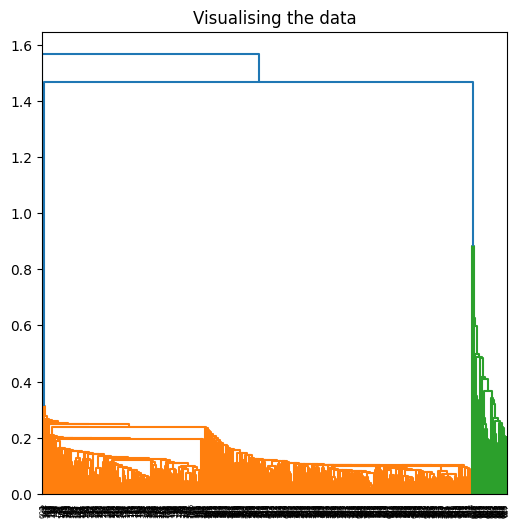

In [6]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='single'))) 

### Complete

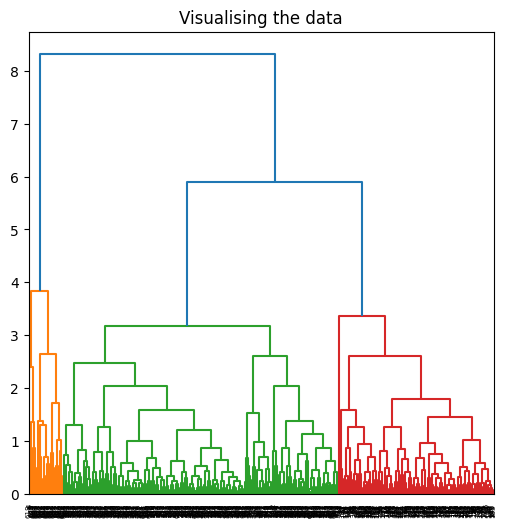

In [7]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='complete'))) 

### Average

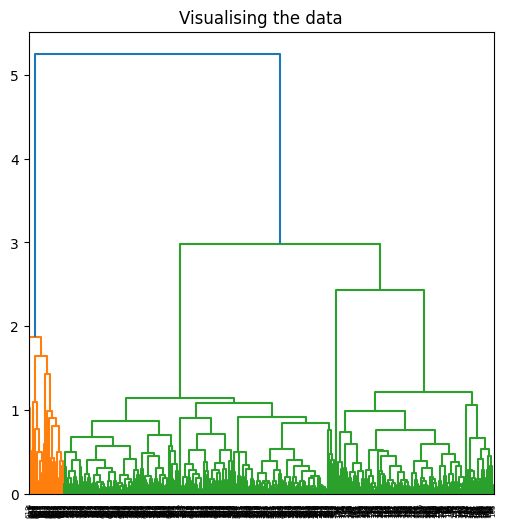

In [8]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='average'))) 

### Centroid / Ward

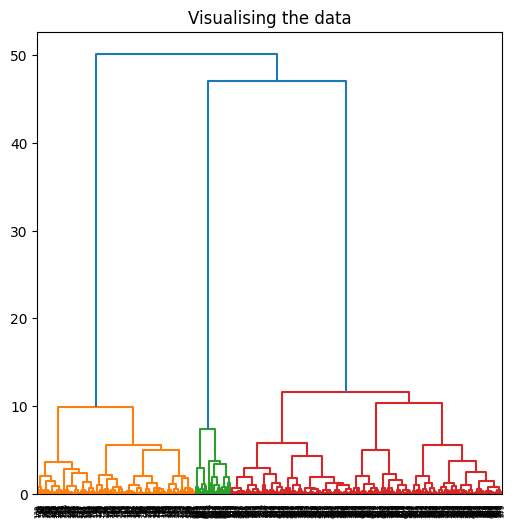

In [9]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward'))) 

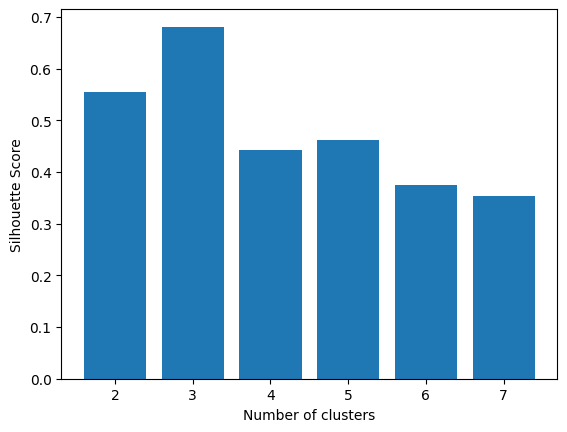

In [10]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [11]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

AgglomerativeClustering(n_clusters=3)

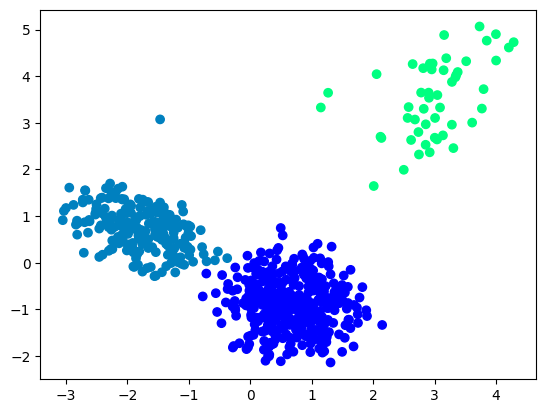

In [12]:
# Visualizing the clustering 
plt.scatter(X[0], X[1],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X), cmap = plt.cm.winter) 
plt.show()